Enter filter size (i.e: 5):  5


filterSize: 5x5
borderSize: 2
pixelsInMask: 25
inputImage: (512, 512)
borderedImage: (516, 516)


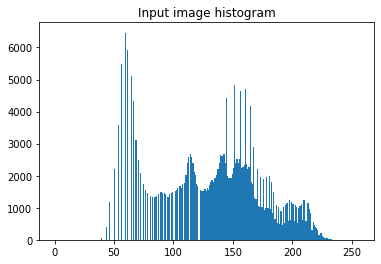

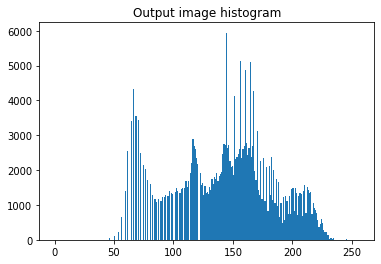

In [2]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

def generateImageWithBorder(inputImage: np.ndarray, borderSize: int):
    size = inputImage.shape
    outputImage = np.zeros((size[0] + borderSize*2, size[1] + borderSize*2), np.uint8)
    outputImage[
        borderSize:borderSize + size[0]-1,  #x1:x2
        borderSize:borderSize + size[1]-1   #y1:y2
        ] = inputImage[
            0:size[0]-1,
            0:size[1]-1]
    return outputImage

def performMedian(inputImage: np.ndarray, filterSize: int):
    borderSize = filterSize - math.ceil(filterSize / 2)
    pixelsInMask = filterSize * filterSize
    middleIndex = math.floor(pixelsInMask / 2) + 1
    outputImage = inputImage.copy()
    borderedImage = generateImageWithBorder(inputImage, borderSize)
    
    print(f'filterSize: {filterSize}x{filterSize}') 
    print('borderSize:', borderSize)
    print('pixelsInMask:', pixelsInMask)     
    print('inputImage:', inputImage.shape)
    print('borderedImage:', borderedImage.shape)
    cv2.imshow('Image with border', borderedImage)
    size = borderedImage.shape    

    for i in range(borderSize, size[0] - borderSize):
        for j in range(borderSize, size[1] - borderSize):
            index = 0
            pixels = [0] * pixelsInMask
            
            for a in range(i - borderSize, i + borderSize):
                for b in range(j - borderSize, j + borderSize):
                    pixels[index] = borderedImage[a, b]
                    index = index + 1
            #middleValue = min(pixels) 
            middleValue = max(pixels)       
            outputImage[i - borderSize, j - borderSize] = middleValue
            
    return outputImage
    
inputimg = cv2.imread('images/lenna.png', cv2.IMREAD_GRAYSCALE)
filterSize = int(input('Enter filter size (i.e: 5): '))
outputimg = performMedian(inputimg, filterSize)

plt.title('Input image histogram')
plt.hist(inputimg.ravel(), 256, [0, 256])
plt.show()

plt.title('Output image histogram')
plt.hist(outputimg.ravel(), 256, [0, 256])
plt.show()    

cv2.imshow('Input image', inputimg)
cv2.imshow('Output image [Min/Max filter]', outputimg)
cv2.waitKey(0)
cv2.destroyAllWindows()